#  Introdução

A extração de dados do Twitter pode ser uma ferramenta valiosa para as empresas públicas que buscam compreender melhor o sentimento e as necessidades dos cidadãos. Com bilhões de tweets sendo publicados diariamente, o Twitter oferece uma riqueza de informações que as empresas públicas podem usar para melhorar a visão e o objetivo da empresa para a sociedade.


Importando as Bibliotecas necessárias para a extração dos dados, tratamento dos dados, análise dos dados e treinamento de modelos

In [1]:
!pip3 install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tweepy
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
#from google.colab                    import drive
from nltk.corpus                     import stopwords
nltk.download('punkt')
from nltk.tokenize                   import word_tokenize
import nltk
nltk.download('vader_lexicon')
from collections import Counter
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn                         import metrics
from sklearn.model_selection         import cross_val_predict
from sklearn.ensemble                import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Chave de acesso para extração de dados via API do Twitter


In [5]:
#Chave
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGJrlgEAAAAAbwqHxRmdRHG1qqeZTzx7OrESAig%3D4QiKcBbjpuEmOXMRala40QU0D2QSEWEPIVyIRKcjlG29JDgACA"

client = tweepy.Client(bearer_token=bearer_token)

In [6]:
df2 = pd.DataFrame(columns=['ID', 'text'])

Método usado para extração dos dados do Twitter

In [7]:
public_tweets = tweepy.Paginator(client.search_recent_tweets, query='eletrobras', 
                              max_results=100).flatten(limit=2000)

In [8]:
analysis = None

In [9]:
count = 0
for tweet in public_tweets:
  analysis = TextBlob(tweet.text)
  
  df2.loc[count] = [tweet.id]+[tweet.text]
  
  count += 1

In [10]:
df2.head(100)

,ID,text
0,1645571914797297664,"RT @leandroruschel: 13) Ainda nesse front, os ..."
1,1645570934038835201,"RT @leandroruschel: 13) Ainda nesse front, os ..."
2,1645570722574548993,@Neka_BR @Sgt_Pimenta4 @LulaOficial @Eletrobra...
3,1645570662449430529,"Falta reestatizar a Eletrobras! Reestatiza já,..."
4,1645569990161211392,@Neka_BR @Sgt_Pimenta4 @LulaOficial @Eletrobra...
...,...,...
95,1645529445090877443,@marinadomst Muito bom deputada @marinadomst ....
96,1645529089472860161,RT @james_samer01: Assistam o vídeo sobre as c...
97,1645529079372759040,"RT @guimareba: QUE BACANA, BOULOS. MAS O BRASI..."
98,1645527518458544129,RT @concursos_publ: Eletrobras: processo selet...


Expressão regular para remover toda a pontuação

In [11]:
# Essa expressão regular remove toda a pontuação
punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df2['text'] = df2.text.map(punc_re)

Expressão Regular para remoção de palavras com números e colocar as palavras em minúsculas

In [12]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
df2['text'] = df2.text.map(lower_alpha)

Tokenização

In [13]:
#faz uso do nltk.download('punkt')
#from nltk.tokenize import word_tokenize

df2['tokens'] = df2.text.map(word_tokenize)
df2.head()

,ID,text,tokens
0,1645571914797297664,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ..."
1,1645570934038835201,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ..."
2,1645570722574548993,neka br sgt lulaoficial eletrobras vejam...,"[neka, br, sgt, lulaoficial, eletrobras, vejam..."
3,1645570662449430529,falta reestatizar a eletrobras reestatiza já ...,"[falta, reestatizar, a, eletrobras, reestatiza..."
4,1645569990161211392,neka br sgt lulaoficial eletrobras advo...,"[neka, br, sgt, lulaoficial, eletrobras, advoc..."


# Análise de Sentimento

A análise de sentimento é importante para rotularmos as saídas dos textos extraídos de nossa base de dados. Para tal função , usamos uma biblioteca de processamento de linguagem natural chamada NLTK (Natural Language Toolkit), importando ferramentas para a possibilidade de análise.

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.tokenize import TweetTokenizer


In [17]:
sia = SentimentIntensityAnalyzer()

In [18]:
def analisar_sentimento2(texto):
    tokens = TweetTokenizer(texto)
    score = sia.polarity_scores(texto)
    return score['compound']


In [19]:
df2['Pontuacao2'] = df2['text'].apply(analisar_sentimento2)

In [20]:
df2.head(16)

,ID,text,tokens,Pontuacao2
0,1645571914797297664,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000
1,1645570934038835201,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000
2,1645570722574548993,neka br sgt lulaoficial eletrobras vejam...,"[neka, br, sgt, lulaoficial, eletrobras, vejam...",0.0000
3,1645570662449430529,falta reestatizar a eletrobras reestatiza já ...,"[falta, reestatizar, a, eletrobras, reestatiza...",0.0000
4,1645569990161211392,neka br sgt lulaoficial eletrobras advo...,"[neka, br, sgt, lulaoficial, eletrobras, advoc...",-0.5423
5,1645569740776013826,falta reestatizar a eletrobras restatiza já ...,"[falta, reestatizar, a, eletrobras, restatiza,...",0.0000
6,1645569368720556033,rt alanghani revogação da lei de falências\n...,"[rt, alanghani, revogação, da, lei, de, falênc...",0.0000
7,1645569147424870400,randolfeap reestatiza a eletrobras já lul...,"[randolfeap, reestatiza, a, eletrobras, já, lu...",0.0000
8,1645569003237285889,falta resstatizar a eletrobras reestatiza já ...,"[falta, resstatizar, a, eletrobras, reestatiza...",0.0000
9,1645568897922523140,guganoblat cadê a reestatização da eletrobras...,"[guganoblat, cadê, a, reestatização, da, eletr...",0.0000


Função para rotular os resultados obtidos pela Pontuação

In [21]:
# Define uma função de mapeamento
def mapear_valor(valor):
    if valor > 0:
        return 'Positivo'
    elif valor < 0:
        return 'Negativo'
    else:
        return 'Neutro'


In [22]:
df2['Pontuacao2'] = df2['Pontuacao2'].astype(float)

In [23]:
df2.head()

,ID,text,tokens,Pontuacao2
0,1645571914797297664,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000
1,1645570934038835201,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000
2,1645570722574548993,neka br sgt lulaoficial eletrobras vejam...,"[neka, br, sgt, lulaoficial, eletrobras, vejam...",0.0000
3,1645570662449430529,falta reestatizar a eletrobras reestatiza já ...,"[falta, reestatizar, a, eletrobras, reestatiza...",0.0000
4,1645569990161211392,neka br sgt lulaoficial eletrobras advo...,"[neka, br, sgt, lulaoficial, eletrobras, advoc...",-0.5423


In [24]:
df2['rotulos'] = df2['Pontuacao2'].apply(mapear_valor)

In [25]:
df2.head()

,ID,text,tokens,Pontuacao2,rotulos
0,1645571914797297664,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000,Neutro
1,1645570934038835201,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000,Neutro
2,1645570722574548993,neka br sgt lulaoficial eletrobras vejam...,"[neka, br, sgt, lulaoficial, eletrobras, vejam...",0.0000,Neutro
3,1645570662449430529,falta reestatizar a eletrobras reestatiza já ...,"[falta, reestatizar, a, eletrobras, reestatiza...",0.0000,Neutro
4,1645569990161211392,neka br sgt lulaoficial eletrobras advo...,"[neka, br, sgt, lulaoficial, eletrobras, advoc...",-0.5423,Negativo


In [26]:
df2.iloc[4]

ID                                          1645569990161211392
text           neka br  sgt    lulaoficial  eletrobras  advo...
tokens        [neka, br, sgt, lulaoficial, eletrobras, advoc...
Pontuacao2                                              -0.5423
rotulos                                                Negativo
Name: 4, dtype: object

In [27]:
df2.head()

,ID,text,tokens,Pontuacao2,rotulos
0,1645571914797297664,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000,Neutro
1,1645570934038835201,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000,Neutro
2,1645570722574548993,neka br sgt lulaoficial eletrobras vejam...,"[neka, br, sgt, lulaoficial, eletrobras, vejam...",0.0000,Neutro
3,1645570662449430529,falta reestatizar a eletrobras reestatiza já ...,"[falta, reestatizar, a, eletrobras, reestatiza...",0.0000,Neutro
4,1645569990161211392,neka br sgt lulaoficial eletrobras advo...,"[neka, br, sgt, lulaoficial, eletrobras, advoc...",-0.5423,Negativo


In [28]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df2.tokens.tolist(), [])

word_list[:10]

['rt',
 'leandroruschel',
 'ainda',
 'nesse',
 'front',
 'os',
 'processos',
 'de',
 'privatização',
 'dos']

In [29]:
# Estas são as etapas para encontrar as palavras mais comuns

#from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(1945, 'o'),
 (1715, 'a'),
 (1298, 'rt'),
 (1176, 'de'),
 (1102, 'e'),
 (1032, 'da'),
 (914, 'eletrobras'),
 (747, 'do'),
 (734, 'não'),
 (710, 'lulaoficial')]

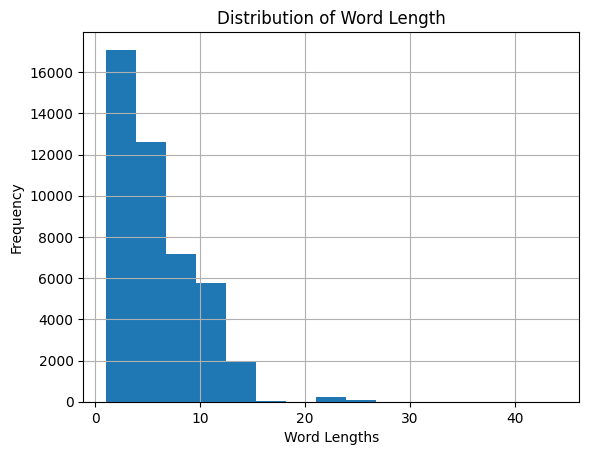

In [30]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [31]:
word_counts[:10]

[(1945, 'o'),
 (1715, 'a'),
 (1298, 'rt'),
 (1176, 'de'),
 (1102, 'e'),
 (1032, 'da'),
 (914, 'eletrobras'),
 (747, 'do'),
 (734, 'não'),
 (710, 'lulaoficial')]

Uso de Stopwords para extração de palavras úteis na Wordcloud

In [32]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')
stop_words.append('co')
stop_words.append('t')
stop_words.append('https')
stop_words.append('rt')
stop_words.append('a')
stop_words.append('e')
stop_words.append('o')
stop_words.append('de')
stop_words.append('com')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df2['tokens_stop'] = df2.tokens.apply(stop_lambda)
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,text,tokens,Pontuacao2,rotulos,tokens_stop
0,1645571914797297664,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000,Neutro,"[leandroruschel, ainda, nesse, front, processo..."
1,1645570934038835201,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000,Neutro,"[leandroruschel, ainda, nesse, front, processo..."
2,1645570722574548993,neka br sgt lulaoficial eletrobras vejam...,"[neka, br, sgt, lulaoficial, eletrobras, vejam...",0.0000,Neutro,"[neka, br, sgt, lulaoficial, eletrobras, vejam..."
3,1645570662449430529,falta reestatizar a eletrobras reestatiza já ...,"[falta, reestatizar, a, eletrobras, reestatiza...",0.0000,Neutro,"[falta, reestatizar, eletrobras, reestatiza, l..."
4,1645569990161211392,neka br sgt lulaoficial eletrobras advo...,"[neka, br, sgt, lulaoficial, eletrobras, advoc...",-0.5423,Negativo,"[neka, br, sgt, lulaoficial, eletrobras, advoc..."


In [33]:
word_list_stop = sum(df2.tokens_stop.tolist(), [])

In [34]:
word_list_stop[:10]

['leandroruschel',
 'ainda',
 'nesse',
 'front',
 'processos',
 'privatização',
 'correios',
 'outras',
 'empresas',
 'cancelados']

In [35]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
df2['tokens_pos'] = (df2.tokens_stop.apply(pos_lambda))
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,ID,text,tokens,Pontuacao2,rotulos,tokens_stop,tokens_pos
0,1645571914797297664,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000,Neutro,"[leandroruschel, ainda, nesse, front, processo...","[(leandroruschel, JJ), (ainda, NN), (nesse, NN..."
1,1645570934038835201,rt leandroruschel ainda nesse front os p...,"[rt, leandroruschel, ainda, nesse, front, os, ...",0.0000,Neutro,"[leandroruschel, ainda, nesse, front, processo...","[(leandroruschel, JJ), (ainda, NN), (nesse, NN..."
2,1645570722574548993,neka br sgt lulaoficial eletrobras vejam...,"[neka, br, sgt, lulaoficial, eletrobras, vejam...",0.0000,Neutro,"[neka, br, sgt, lulaoficial, eletrobras, vejam...","[(neka, JJ), (br, NN), (sgt, NN), (lulaoficial..."
3,1645570662449430529,falta reestatizar a eletrobras reestatiza já ...,"[falta, reestatizar, a, eletrobras, reestatiza...",0.0000,Neutro,"[falta, reestatizar, eletrobras, reestatiza, l...","[(falta, NN), (reestatizar, NN), (eletrobras, ..."
4,1645569990161211392,neka br sgt lulaoficial eletrobras advo...,"[neka, br, sgt, lulaoficial, eletrobras, advoc...",-0.5423,Negativo,"[neka, br, sgt, lulaoficial, eletrobras, advoc...","[(neka, JJ), (br, NN), (sgt, NN), (lulaoficial..."


In [36]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores (usando o stop)
word_counts_stop = Counter(word_list_stop)
a = word_counts_stop

# Inverta a chave / valores no dicionário para classificar
word_counts_stop = list(zip(word_counts_stop.values(), word_counts_stop.keys()))

# Classifique a lista por contagem
word_counts_stop = sorted(word_counts_stop, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_stop[:10]

[(914, 'eletrobras'),
 (710, 'lulaoficial'),
 (442, 'lula'),
 (371, 'privatização'),
 (343, 'governo'),
 (307, 'gleisi'),
 (278, 'eletrobrás'),
 (262, 'pra'),
 (262, 'coloca'),
 (240, 'reestatizaeletrobrasjá')]

# Nuvem de Palavras 

Wordcloud – em português, nuvem de palavras ou nuvem de tags – é um tipo de visualização de dados muito poderoso e ferramenta de Data Science usado quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

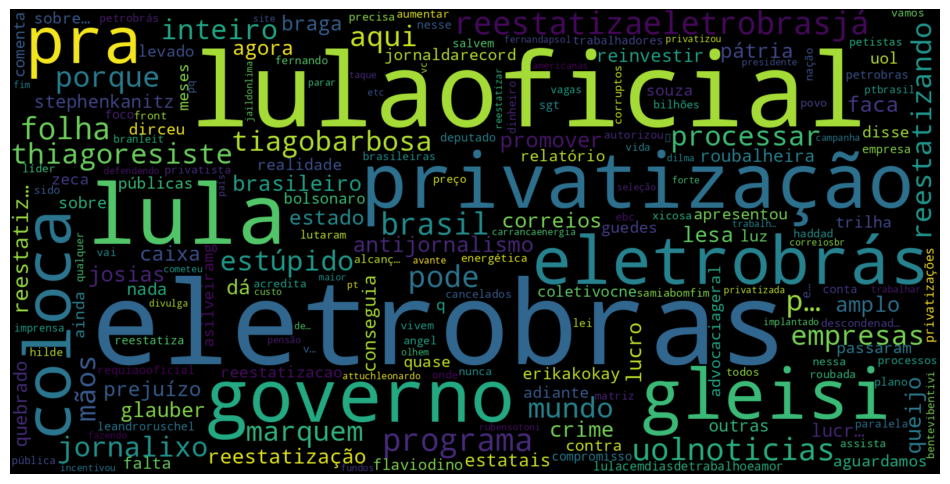

In [37]:
text = word_list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Extração de dados em um excel

In [38]:
file_name = 'Basededados_twitter_eletrobras.xlsx'
df2.to_excel(file_name)

# Modelagem

Foram gerados 4 modelos de classificação:

- Multinomial Naive Bayes
- Multnomial usando Bigrams
- Random Forest
- Support Vector Machine

## Multinomial Naive Bayes

In [40]:
X_train_mnb, X_test_mnb, y_train_mnb, y_test_mnb = train_test_split(df2['text'], df2['rotulos'], test_size=0.2)

In [41]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

X_train_vectors = vectorizer.fit_transform(X_train_mnb)
X_test_vectors = vectorizer.transform(X_test_mnb)



In [42]:
# criar modelo multinomial
mnb = MultinomialNB()

# treinar o modelo multinomial
mnb.fit(X_train_vectors, y_train_mnb)


MultinomialNB()

In [43]:
# fazer previsões no conjunto de teste
y_pred_mnb = mnb.predict(X_test_vectors)

# imprimir relatório de classificação
print(classification_report(y_test_mnb, y_pred_mnb))


              precision    recall  f1-score   support

    Negativo       0.75      0.89      0.82        45
      Neutro       0.98      0.95      0.97       344
    Positivo       0.57      0.73      0.64        11

    accuracy                           0.94       400
   macro avg       0.77      0.86      0.81       400
weighted avg       0.95      0.94      0.94       400



In [44]:
metrics.accuracy_score(y_test_mnb, y_pred_mnb)

0.9375

In [45]:
print(pd.crosstab(y_test_mnb, y_pred_mnb, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        40       4         1   45
Neutro          12     327         5  344
Positivo         1       2         8   11
All             53     333        14  400


## Multinomial usando Bigramas

In [46]:
X_train_mnb2, X_test_mnb2, y_train_mnb2, y_test_mnb2 = train_test_split(df2['text'], df2['rotulos'], test_size=0.2)

In [47]:
#usando melhoria com Bigrams
vectorizer = CountVectorizer(ngram_range = (1, 2),analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

X_train_mnb2_vectors = vectorizer.fit_transform(X_train_mnb2)
X_test_mnb2_vectors = vectorizer.transform(X_test_mnb2)

modelo = MultinomialNB()
# treinar o modelo multinomial
modelo.fit(X_train_mnb2_vectors, y_train_mnb2)


MultinomialNB()

In [48]:
# fazer previsões no conjunto de teste
y_pred_mnb2 = modelo.predict(X_test_mnb2_vectors)

# imprimir relatório de classificação
print(classification_report(y_test_mnb2, y_pred_mnb2))

              precision    recall  f1-score   support

    Negativo       0.84      0.84      0.84        62
      Neutro       0.97      0.93      0.95       329
    Positivo       0.30      0.78      0.44         9

    accuracy                           0.92       400
   macro avg       0.71      0.85      0.74       400
weighted avg       0.94      0.92      0.92       400



In [49]:
metrics.accuracy_score(y_test_mnb2, y_pred_mnb2)

0.915

In [50]:
print(pd.crosstab(y_test_mnb2, y_pred_mnb2, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        52       6         4   62
Neutro          10     307        12  329
Positivo         0       2         7    9
All             62     315        23  400


## Modelo Randow Forest

In [51]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df2['text'], df2['rotulos'], test_size=0.2)

In [52]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

In [53]:
train_data_features = vectorizer.fit_transform(X_train_rf)
train_data_features

<1600x2692 sparse matrix of type '<class 'numpy.int64'>'
	with 21069 stored elements in Compressed Sparse Row format>

In [54]:
forest = RandomForestClassifier(n_estimators = 100)
forest

RandomForestClassifier()

In [55]:
class_sentimentos = y_train_rf.values
class_sentimentos

array(['Neutro', 'Neutro', 'Neutro', ..., 'Neutro', 'Neutro', 'Neutro'],
      dtype=object)

In [56]:
forest = forest.fit(train_data_features, class_sentimentos)
forest

RandomForestClassifier()

In [57]:
test_data_features_resultados = vectorizer.transform(X_test_rf)
test_data_features_resultados

<400x2692 sparse matrix of type '<class 'numpy.int64'>'
	with 4923 stored elements in Compressed Sparse Row format>

In [58]:
resultados = forest.predict(test_data_features_resultados)
resultados

array(['Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Negativo',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Positivo', 'Positivo',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Negativo', 'Neutro',
       'Negativo', 'Neutro', 'Negativo', 'Negativo', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro

In [59]:
metrics.accuracy_score(y_test_rf, resultados)

0.9675

In [60]:
print(metrics.classification_report(y_test_rf, resultados))

              precision    recall  f1-score   support

    Negativo       1.00      0.84      0.91        51
      Neutro       0.96      1.00      0.98       337
    Positivo       1.00      0.58      0.74        12

    accuracy                           0.97       400
   macro avg       0.99      0.81      0.88       400
weighted avg       0.97      0.97      0.97       400



In [61]:
print(pd.crosstab(y_test_rf, resultados, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        43       8         0   51
Neutro           0     337         0  337
Positivo         0       5         7   12
All             43     350         7  400


## Support Vector Machine (SVM)

In [62]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(df2['text'], df2['rotulos'], test_size=0.2)

In [63]:
#vectorizer = TfidfVectorizer( max_features=5000)
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

In [64]:
X_train_svm_vectors = vectorizer.fit_transform(X_train_svm)
X_test_svm_vectors = vectorizer.transform(X_test_svm)

In [65]:
# criar modelo SVM
svm = SVC(kernel='linear')
# treinar o modelo SVM
svm.fit(X_train_svm_vectors, y_train_svm)

SVC(kernel='linear')

In [66]:
# fazer previsões no conjunto de teste
y_pred_svm = svm.predict(X_test_svm_vectors)

# imprimir relatório de classificação
print(classification_report(y_test_svm, y_pred_svm))

              precision    recall  f1-score   support

    Negativo       0.96      0.75      0.84        61
      Neutro       0.94      0.99      0.97       329
    Positivo       1.00      0.40      0.57        10

    accuracy                           0.94       400
   macro avg       0.97      0.72      0.79       400
weighted avg       0.94      0.94      0.94       400



In [67]:
print(pd.crosstab(y_test_svm, y_pred_svm, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        46      15         0   61
Neutro           2     327         0  329
Positivo         0       6         4   10
All             48     348         4  400


In [68]:
metrics.accuracy_score(y_test_svm, y_pred_svm)

0.9425